# The Coprime State

In [1]:
import coprime
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy
from toqito.state_props import negativity
from tqdm import tqdm
import pennylane as qml
from toqito.random import random_density_matrix
import networkx as nx

The following Notebook uses the `coprime` library to generate data and figures relating to coprime states and related concepts.

### Section 1: Generating the Coprime State and Verifying the `Coprime` Module

In [2]:
# Defines the coprime state for D = 3

state = coprime.coprime_state(3)
print(state)

[0.37796447 0.37796447 0.37796447 0.37796447 0.         0.37796447
 0.37796447 0.37796447 0.        ]


We can compare this to the expected value of the coprime state, which is:
    
$$|\psi(3)\rangle \ = \ \frac{1}{\sqrt{7}} \big( |11\rangle \ + \ |12\rangle \ + \ |13\rangle \ + \ |21\rangle \ + \ |23\rangle \ + \ |31\rangle \ + \ |32\rangle \big)$$

These two states are clearly the same, in the convention of each entry of the vector being order from smallest to largest in the dictionary order on positive integer pairs.

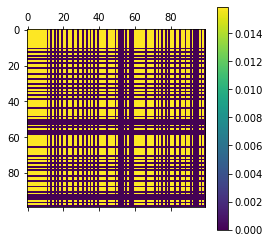

In [3]:
# Generates the density matrix corresponding to the coprime state for D = 10

state = coprime.coprime_state(10)
density_matrix = coprime.density_matrix(state)

plt.matshow(density_matrix)
plt.colorbar()
plt.show()

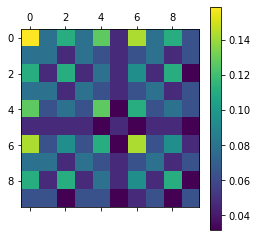

In [4]:
# Generates the density matrix corresponding to the reduced density matrix of the coprime state

reduced_state = coprime.partial_trace(density_matrix)

plt.matshow(reduced_state)
plt.colorbar()
plt.show()

We can verify that this is the correct representation of the reduced density matrix of the coprime state by comparing it to the analytical form of the matrix:
    
$$\rho^{A} \ = \ \frac{1}{\Omega(D)} \displaystyle\sum_{a, c} \sigma(a, \ c) |a\rangle \langle c |$$

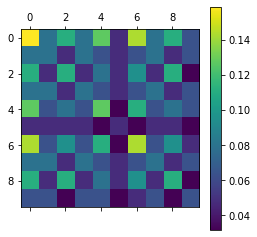

In [5]:
# Creates the normalization factor

norm = coprime.count_coprimes(10, 10)

# Creates the sigma coefficients

def sigma_coeff(a, c, dimension):
    
    s = 0
    for i in range(1, dimension+1):
        if (math.gcd(a, i) == 1 and math.gcd(c, i) == 1):
            s += 1
    
    return s

# Creates the density matrix
dimension = 10

matrix = [[0 for i in range(0, dimension)] for j in range(0, dimension)]

for i in range(0, dimension):
    for j in range(0, dimension):
        matrix[i][j] = sigma_coeff(i+1, j+1, dimension)

matrix = (1/norm) * np.array(matrix)

plt.matshow(matrix)
plt.colorbar()
plt.show()

Clearly, these are the same matrix, thus verifying our analytical result.

### Section 2: Entanglement of the Coprime State

Now that we have generated the reduced density matrix, we can calculate entanglement properties.

**Entropy of Entanglement**

The entropy of entanglement is defined as the von Neumann entropy of the reduced density matrix:

$$E(\rho) \ = \ \text{Tr} (\rho_{A} \ln \rho_{A} )$$

We can plot the entropy with increasing dimension:

/usr/local/lib/python3.7/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:838: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


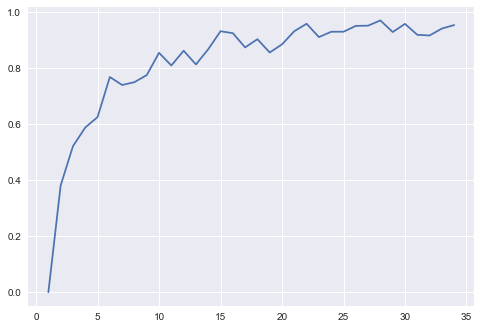

In [6]:
dimensions = range(1, 35)
entropy = []
for i in dimensions:
    entropy.append(coprime.entropy(coprime.reduced_coprime_state(i)))

plt.style.use('seaborn')
plt.plot(dimensions, entropy)
plt.show()

**Renyi Entropy**

The Renyi Entropy is defined as:

$$\frac{1}{1 \ - \ \alpha} \log \text{Tr}(\rho^{\alpha}_{A})$$

**Negativity**

The negativity of a density matrix is defined as:

$$\mathcal{N}(\rho) \ = \ \frac{\text{Tr} \sqrt{T_{A}(\rho)^{\dagger} T_{A}(\rho)} \ - \ 1}{2}$$

We can implement this using the ``coprime`` module:

In [7]:
print(coprime.negativity(reduced_state))

0.04478468797321


Negativity is an **entanglement monotone**, meaning that it is a valid measure of entanglement. We can plot the negativity with increasing dimension of the coprime state:


100%|██████████| 34/34 [00:02<00:00, 11.40it/s]
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


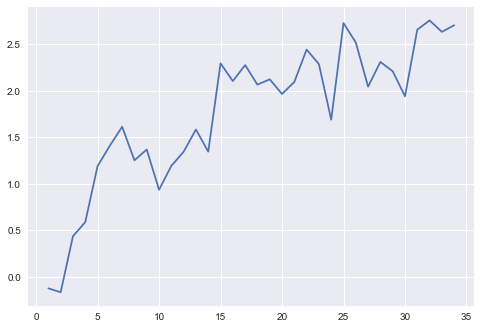

In [10]:
dimensions = range(1, 35)
negativity = []
for i in tqdm(dimensions):
    negativity.append(coprime.negativity(coprime.variable_coprime_density(12, i)))

plt.style.use('seaborn')
plt.plot(dimensions, negativity)
plt.show()

### The Variable Coprime State

### Section 3: The Fourier Transform of the Coprime State



In [ ]:
In addition to everything that has been done up until this point, we can also take 